# Homework 2: scenario analysis
This notebook shows different scenarios for Europe Co2 emissions in the electricity sector. Furthermore, the natural gas and hydrogen usage will be discussed. The data used in this notebook can be acquired at https://data.ece.iiasa.ac.at/ar6

First some packages have to be imported. 

In [36]:
# imports
import pyam
import matplotlib.pyplot as plt

The downloaded data is saved in a .xlsx file. To read the acquired dataset we use the pyam package.

In [48]:
df = pyam.IamDataFrame(data='ar6_snapshot_1682257488.xlsx')
print(df.variable)

pyam.core - INFO: Reading file ar6_snapshot_1682257488.xlsx


['Emissions|CO2|Energy|Supply|Electricity', 'Secondary Energy|Electricity|Gas', 'Secondary Energy|Electricity|Hydro']


Now we can choose a model from the list below.

In [39]:
print(df.model)

['AIM/CGE 2.2', 'GEM-E3_V2021', 'IMAGE 3.2', 'MESSAGEix-GLOBIOM_1.1', 'REMIND 2.1', 'REMIND-MAgPIE 1.7-3.0', 'REMIND-MAgPIE 2.1-4.2', 'REMIND-MAgPIE 2.1-4.3', 'WITCH 5.0']


I chose the MESSAGEix-GLOBIOM_1.1 model because it shows the most scenarios.

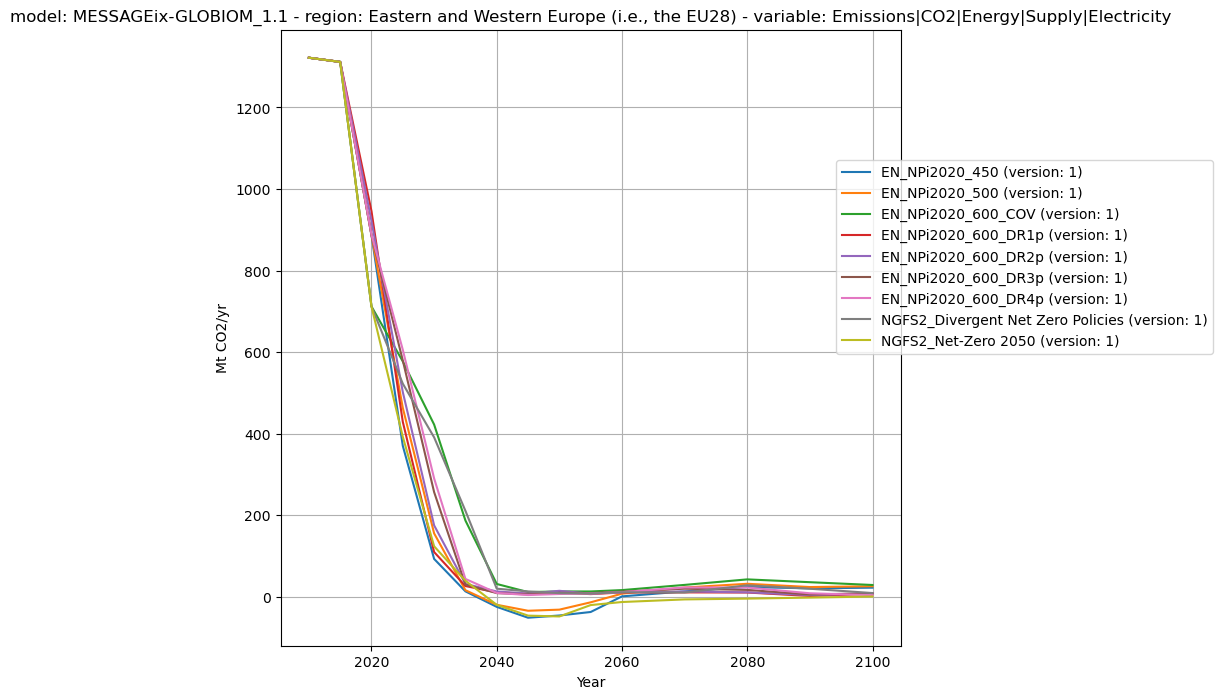

In [24]:
# filter model
filt_df = df.filter(model="MESSAGEix-GLOBIOM_1.1")
# plot data
fig, ax = plt.subplots(figsize=(8, 8))
filt_df.filter(variable='Emissions|CO2|Energy|Supply|Electricity', region='Eastern and Western Europe (i.e., the EU28)').plot(ax=ax,legend=True)
ax.legend(loc='upper center', bbox_to_anchor=(1.2, 0.8))
ax.grid()

The figure above shows the CO2 emissions of Europe due electricity supply. As seen in the figure above, all scenarios show a similar tendency. In 2020 all scenarios start with around 1000 Mt CO2 emitted per year and drop steeply towards 0 by 2040. Some scenarios like EN_NPi2020_450 or NGFS2_Net-Zero 2050 predict negative carbon emissions.

Next we will take a closer look at electricity production from natural gas.

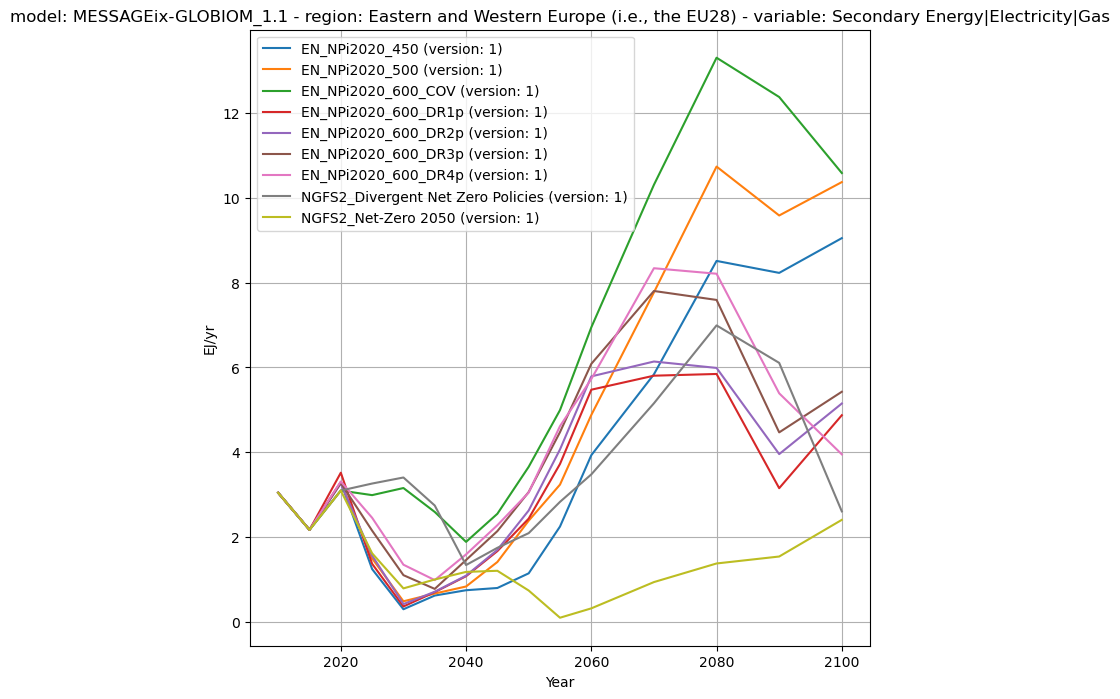

In [49]:
filt_df = df.filter(model="MESSAGEix-GLOBIOM_1.1")
fig, ax = plt.subplots(figsize=(8, 8))
filt_df.filter(variable='Secondary Energy|Electricity|Gas', region='Eastern and Western Europe (i.e., the EU28)').plot(ax=ax,legend=True)
ax.grid()

The figure shows a decline in natural gas usage until 2030/2040 (except NGFS2_Net-Zero 2050). After that, all scenarios  show an increasing usage of natural gas until 2080. Personally, I can not explain this trend. I did not find enough information about the scenarios. Emissions are decreasing, natural gas usage is increasing. My guess would be the increasing usage of carbon capture methods.

Lastly we will take a closer look at the hydrogen usage for electricity production.

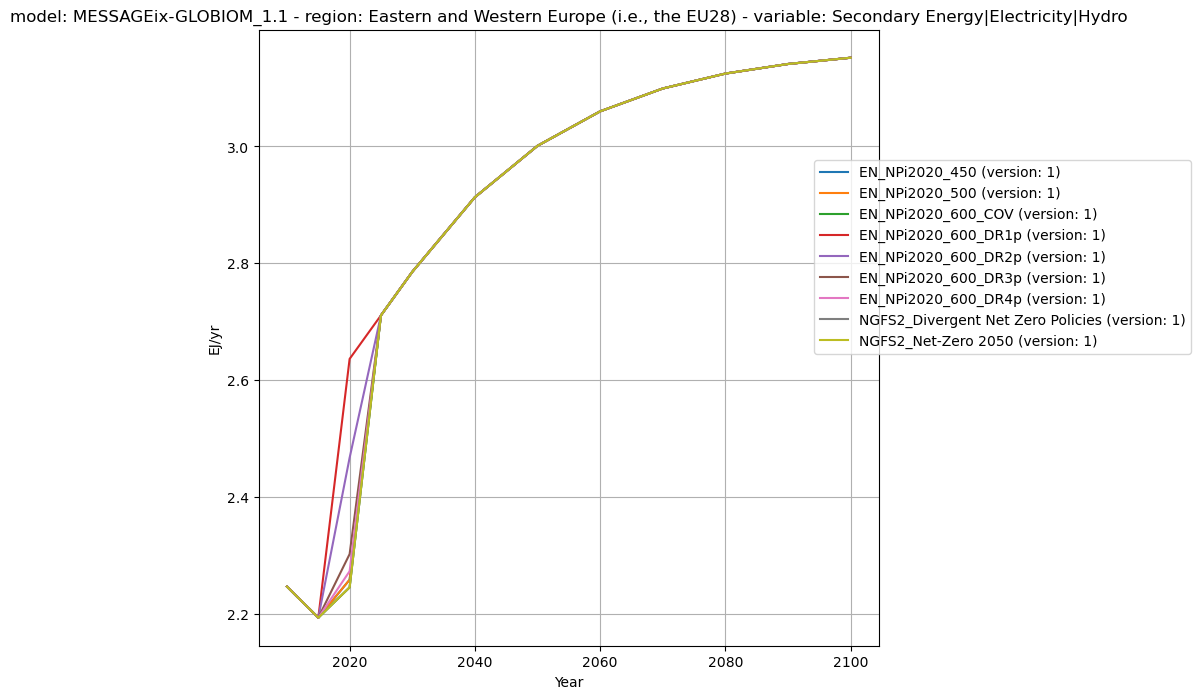

In [50]:
filt_df = df.filter(model="MESSAGEix-GLOBIOM_1.1")
fig, ax = plt.subplots(figsize=(8, 8))
filt_df.filter(variable='Secondary Energy|Electricity|Hydro', region='Eastern and Western Europe (i.e., the EU28)').plot(ax=ax,legend=True)
ax.grid()

As shown in the figure above, all scenarios show a very similar development. A steep increase with saturation around the year 2100. Differences in the different scenarios only occur in the years before 2025. If you compare the previous figure with this one, it clearly shows that natural gas has significant more impact than hydrogen.